In [42]:
# Import essentials
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

In [43]:
train_df = pd.read_excel('train.xlsx') # Load the `train` file

In [44]:
train_df.party[15]


'comuns'

In [36]:
#!pip install stop_words

In [46]:
import re
from stop_words import get_stop_words

def special_char(text):
    """Retrieve the special characters
    """
    return re.sub(r'\W', ' ', text)

def filter_single(text):
    """remove all single characters
    """
    return re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

def filter_singleStart(text):
    """Remove single characters from the start
    """
    return re.sub(r'\^[a-zA-Z]\s+', ' ', text)

def filter_multiplespace(text):
    """Substituting multiple spaces with single space
    """
    return re.sub(r'\s+', ' ', text, flags=re.I)

def stop_words():
    """Retrieve the stop words for vectorization -Feel free to modify this function
    """
    return get_stop_words('es') + get_stop_words('ca') + get_stop_words('en')

def filter_mentions(text):
    """Utility function to remove the mentions of a tweet
    """
    return re.sub("@\S+", "", text)

def filter_hashtags(text):
    """Utility function to remove the hashtags of a tweet
    """
    return re.sub("#\S+", "", text)

def filter_symb_hashtag(text):
    """Utility function to remove the hashtags symbol of a tweet
    """
    return re.sub("#", "", text)

def filter_symb1(text):
    """Utility function to remove special characters of a tweet
    """
    return re.sub(r'[(:+*?¿!¡.,;-`"")]', "", text)

#def translate_text(text):
#    """Utility function to translate the text of a tweet
#    """
#    return translator.translate(text, dest='es').text

def lower_text(text):
    """Utility function to lower text
    """
    return text.lower()

def eliminate_numbers(text):
    """Utility function to lower text
    """
    return re.sub(r'\w*\d\w*', '', text).strip()

def eliminate_emojiis(text):
    """Utility to eliminate emojiis from the text
    """
    em_pat=re.compile("["
       u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
                           "]+", flags=re.UNICODE)
    return  em_pat.sub(r'',text)

### Pre-Processing (1-3 fets)
1) eliminate symbols :,?¿!';-
2) eliminate single characters  
2b) numbers (eliminate numbers and words with numbers)  
3) all to lower  
4) accents? (amb unidecode, pero passa ç a c, ñ a n, aixo introdueix errors?)  
5) i is fessim una columna amb 0-1 indicant si hi ha emoji? (sigui com sigui, pero algu potser els fa servir bastant?)
6) segurament, si hi ha hashtag del partit l'ha posat el mateix partit (publicitat)

In [47]:
train_df['text_clean'] = [filter_symb1(filter_symb_hashtag(eliminate_emojiis(filter_single(eliminate_numbers(lower_text(row['text'])))))) for index, row in train_df.iterrows()]
train_df.head(5)

,Id,username,party,text,created_at,retweet_count,favorite_count,text_clean
0,0,martarovira,erc,Últim acte de campanya! Aquí tossudament alçat...,2017-12-19 20:12:01,785,2295,últim acte de campanya aquí tossudament alçats...
1,1,xavierdomenechs,comuns,#Badalona necessita uns pressupostos que posin...,2018-04-27 10:04:19,55,93,badalona necessita uns pressupostos que posin ...
2,2,albert_rivera,cs,Encuentro Villacís-Valls para lanzar una estra...,2018-11-17 20:34:58,357,622,encuentro villacís-valls para lanzar una estra...
3,3,jaumecollboni,psc,"“La palabra es como una bala, no tiene retorno...",2018-10-22 18:10:01,4,6,“la palabra es como una bala no tiene retorno”...
4,4,albiol_xg,ppc,"📻 Esta noche, a partir de las 22:10h, me entre...",2018-08-16 10:30:27,20,47,esta noche partir de las me entrevistan en l...


In [48]:
print (train_df.text[12])
print (train_df.text_clean[12])

“Estas son las reglas del juego en nuestro Estado de Derecho y en nuestra democracia” (Lesmes) la clave aquí está en la palabra "nuestro", "nuestro Estado" 
“estas son las reglas del juego en nuestro estado de derecho en nuestra democracia” lesmes la clave aquí está en la palabra nuestro nuestro estado


### Afegim una columna amb idioma
tot i que alguns resultats ens han mostrat pitjors scores

In [49]:
# Translate text to spanish and define column (vector) with language (spa:0, cat:1)
#!pip install langdetect
from langdetect import detect 
train_df['language'] = [detect(row['text']) for index, row in train_df.iterrows()]

# language column to 1-0 --> esta columna lang_val la ponemos al final del array (Xvec)
train_df['lang_val'] = np.where(train_df.language == 'ca', 1, 0)
train_df.head(5)



,Id,username,party,text,created_at,retweet_count,favorite_count,text_clean,language,lang_val
0,0,martarovira,erc,Últim acte de campanya! Aquí tossudament alçat...,2017-12-19 20:12:01,785,2295,últim acte de campanya aquí tossudament alçats...,ca,1
1,1,xavierdomenechs,comuns,#Badalona necessita uns pressupostos que posin...,2018-04-27 10:04:19,55,93,badalona necessita uns pressupostos que posin ...,ca,1
2,2,albert_rivera,cs,Encuentro Villacís-Valls para lanzar una estra...,2018-11-17 20:34:58,357,622,encuentro villacís-valls para lanzar una estra...,es,0
3,3,jaumecollboni,psc,"“La palabra es como una bala, no tiene retorno...",2018-10-22 18:10:01,4,6,“la palabra es como una bala no tiene retorno”...,es,0
4,4,albiol_xg,ppc,"📻 Esta noche, a partir de las 22:10h, me entre...",2018-08-16 10:30:27,20,47,esta noche partir de las me entrevistan en l...,es,0


### coses per fer:
- lemmatization: sino ho podem traduir (el googletranslator dona problemes) no el podem aplicar (no n'hi ha en catala)  
- identificar hastags? ara per ara han quedat

# Models
Ho fem fent servir el pipeline (aixo ens permet aplicar una funcio per buscar parametres optims)

## Linear SVC
### Resultats
1. pipeline per trobar millors parametres: aobre text filtrats numbers, simbols especials i single letters (queden hashtags i emojis) 
score = 0.72 -->  Text Clean  
{'clf__C': 1.0, 'clf__dual': False, 'clf__fit_intercept': True, 'clf__intercept_scaling': 1, 'clf__penalty': 'l2', 'vect__max_features': 6000, 'vect__min_df': 1, 'vect__ngram_range': (1, 1), 'vect__stop_words':
2. apliquem model sobre variacions del vector? per exemple treient hasthtags?  
score = 0.73  --> Clean i eliminants Hasthtags
{'clf__C': 1.0, 'clf__dual': False, 'clf__fit_intercept': True, 'clf__intercept_scaling': 10, 'clf__penalty': 'l2', 'vect__max_features': 6000, 'vect__min_df': 1, 'vect__ngram_range': (1, 1), 'vect__stop_words'
3. eliminem tb emojiis
score= 0.73
{'clf__C': 1.0, 'clf__dual': False, 'clf__fit_intercept': True, 'clf__intercept_scaling': 10, 'clf__penalty': 'l2', 'vect__max_features': 6000, 'vect__min_df': 1, 'vect__ngram_range': (1, 1), 'vect__stop_words':


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC, LinearSVR, SVC
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LinearSVC()),
])

X_train, X_test, y_train, y_test = train_test_split(train_df['text_clean'], train_df['party'].values, test_size=0.20, random_state=345 )
param_grid = [
    { 
          "clf__penalty": ["l2"],
          "clf__dual":[False,True],
          "clf__C":[0.1, 1.0],
          "clf__fit_intercept":[True,False],
          "clf__intercept_scaling":[0.1,1,10],
          "vect__min_df":[1,2,3,4],
          "vect__ngram_range": [(1, 1), (1, 2),(1, 3)],
          "vect__stop_words":[stop_words()],
          "vect__max_features":[6000, 8000, 10000]
    },
    { 
          "clf__penalty": ["l1"],
          "clf__dual":[False],
          "clf__C":[0.1, 1.0],
          "clf__fit_intercept":[True,False],
          "clf__intercept_scaling":[0.1,1,10],
          "vect__min_df":[1,2,3,4],
          "vect__ngram_range": [(1, 1),(1, 2),(1, 3)],
          "vect__stop_words":[stop_words()],
          "vect__max_features":[6000, 8000, 10000]
    }
]

grid = GridSearchCV(pipeline, cv=6, param_grid=param_grid)
grid.fit(X_train,y_train)


print ("score = %3.2f" %(grid.score(X_test,y_test)) )
print (pd.DataFrame.from_dict(grid.cv_results_).loc[grid.best_index_ ])
print (grid.best_params_ )

/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'des', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


score = 0.73
mean_fit_time                                                           0.0927242
std_fit_time                                                           0.00957866
mean_score_time                                                        0.00965885
std_score_time                                                        0.000220616
param_clf__C                                                                    1
param_clf__dual                                                             False
param_clf__fit_intercept                                                     True
param_clf__intercept_scaling                                                   10
param_clf__penalty                                                             l2
param_vect__max_features                                                     6000
param_vect__min_df                                                              1
param_vect__ngram_range                                                    (1, 1)
par

/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/pablo/anaconda3/lib/python3.

In [51]:


X_train, X_test, y_train, y_test = train_test_split(train_df['text_clean'], train_df['party'].values, test_size=0.20, random_state=345 )
vectorizer= TfidfVectorizer(min_df=1, ngram_range=(1,2), max_features=8000, stop_words=stop_words())

Xvec=vectorizer.fit_transform(X_train).toarray()
Xvec_test=vectorizer.transform(X_test).toarray()




/home/pablo/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'des', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# Manifold plot

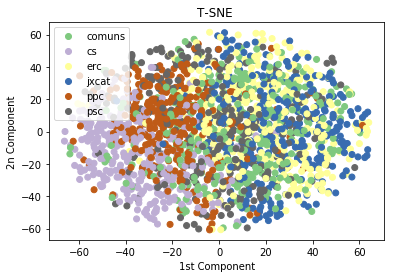

In [59]:
X_tot = vectorizer.fit_transform(train_df['text_clean']).toarray()
y_tot = train_df['party'].values


from sklearn import manifold
n_components = 3
perplexity = 100
tsne = manifold.TSNE(n_components=n_components, init='random',random_state=0, perplexity=perplexity)
X_tsne = tsne.fit_transform(X_tot)
b,w = np.unique(y_tot.tolist(), return_inverse=True)


import matplotlib.cm as cm
#With TSNE
plt.figure()
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1],c=w,cmap=cm.get_cmap('Accent'))
plt.title("T-SNE ")
plt.xlabel("1st Component")
plt.ylabel("2n Component")

#añadir leyenda (ni puta idea que fa aqui)
labels = np.unique(w)
labels2= b
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels2,loc='best')
plt.show()



Text(0, 0.5, '2n Component')

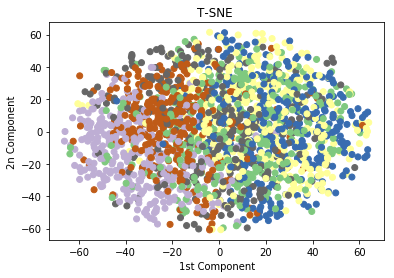

In [76]:
plt.figure()
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1],c=w,cmap=cm.get_cmap('Accent'))
plt.title("T-SNE ")
plt.xlabel("1st Component")
plt.ylabel("2n Component")

In [72]:
labels

array([0, 1, 2, 3, 4, 5])

In [60]:
!pip install bokeh
from bokeh.plotting import figure, show

In [85]:
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(100*X_tsne[:,0], 2*X_tsne[:,1])
]

p=figure(plot_width=800, plot_height=400)
p.scatter(X_tsne[:,0], X_tsne[:,1],color='inferno',fill_alpha=.2)
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: inferno [renderer: GlyphRenderer(id='2709', ...)]


In [ ]:
clf=LinearSVC(C=1, dual=False, fit_intercept=True, intercept_scaling=10,penalty='l2',)
clf.fit(Xvec,y_train)
clf.predict(Xvec_test)

print ("score = %3.2f" %(clf.score(Xvec_test,y_test)) )